# Predicting the Sale Price of Bulldozers using Machine Learning 🚜 

This project is an machine learning project to use the characteristics of bulldozers and their past sales prices to predict the sale price of future bulldozers.

The Challenge presented in this link:

https://www.kaggle.com/code/rambomind/bulldozer-price-prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv("TrainAndValid.csv", 
                 low_memory=False)

In [3]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

(None,
 SalesID                          0
 SalePrice                        0
 MachineID                        0
 ModelID                          0
 datasource                       0
 auctioneerID                 20136
 YearMade                         0
 MachineHoursCurrentMeter    265194
 UsageBand                   339028
 saledate                         0
 fiModelDesc                      0
 fiBaseModel                      0
 fiSecondaryDesc             140727
 fiModelSeries               354031
 fiModelDescriptor           337882
 ProductSize                 216605
 fiProductClassDesc               0
 state                            0
 ProductGroup                     0
 ProductGroupDesc                 0
 Drive_System                305611
 Enclosure                      334
 Forks                       214983
 Pad_Type                    331602
 Ride_Control                259970
 Stick                       331602
 Transmission                224691
 Turbocharged        

In [4]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

In [5]:
# Parsing Date Column

df = pd.read_csv("TrainAndValid.csv",
                low_memory=False,
                parse_dates=["saledate"])

In [6]:
df.saledate.dtype

dtype('<M8[ns]')

In [7]:
# Sorting DataFrame by saledate

df.sort_values(by=["saledate"], inplace=True, ascending=True)

df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [8]:
# Backup of the original DataFrame
df_tmp = df.copy()

In [9]:
# Adding datetime parameters for saledate column

df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear





In [10]:
df_tmp.drop("saledate", axis=1, inplace=True)

In [11]:
df_tmp.state.value_counts()[:10]

state
Florida        67320
Texas          53110
California     29761
Washington     16222
Georgia        14633
Maryland       13322
Mississippi    13240
Ohio           12369
Illinois       11540
Colorado       11529
Name: count, dtype: int64

In [12]:
# ThiTruning all of the strings value into category values

for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered() 

In [13]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   object  
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  object  
 12  fiModelSeries             58667 non-null   object  
 13  fiModelDescriptor         748

In [14]:
# Checking missing data

df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [15]:
# Filling missing values

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing for control
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [16]:
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [17]:
# Filling and turning categorical variables into numbers
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column to indicate missing values
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1(added because there are -1 values in some columns)
        df_tmp[label] = pd.Categorical(content).codes + 1

In [18]:
# Splitting data into train/validation sets

df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [19]:
# Split data into X & y

X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [20]:
# Create evaluation function, use RMSLE

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    # Calculate root mean squared log error between predictions and true labels.
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create a function to evaluate model on a few differente levels

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Valid MAE": mean_absolute_error(y_valid, val_preds),
             "Training RMSLE": rmsle(y_train, train_preds),
             "Valid RMSLE": rmsle(y_valid, val_preds),
             "Default score": r2_score(y_train, train_preds),
             "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

In [21]:
show_scores

<function __main__.show_scores(model)>

In [22]:
# Change max_samples value
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000)

In [23]:
%%time
# Cutting down on the max number of samples each estimator can see to improve training time
# That strategy is for the use of the RandomizedSearchCV that take a lot of time

model.fit(X_train, y_train)

CPU times: total: 41.3 s
Wall time: 3.29 s


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': np.float64(0.257745378256977),
 'Valid RMSLE': np.float64(0.29362638671089003),
 'Default score': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

In [25]:
%%time
# Hyperparameter tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# Differente RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2),
          "max_features": [1, "sqrt", "log2"],
          "max_samples": [10000]}

# Instatiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(
                                                    n_jobs=-1,
                                                    random_state=42),
                                                    param_distributions=rf_grid,
                                                    n_iter=10,
                                                    cv=5,
                                                    verbose=True)

# Fit the model!
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 1min 20s
Wall time: 25.9 s


,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'max_depth': [None, 3, ...], 'max_features': [1, 'sqrt', ...], 'max_samples': [10000], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), ...}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [26]:
rs_model.best_params_

{'n_estimators': np.int64(70),
 'min_samples_split': np.int64(14),
 'min_samples_leaf': np.int64(3),
 'max_samples': 10000,
 'max_features': 'log2',
 'max_depth': 10}

In [27]:
show_scores(rs_model)

{'Training MAE': 9705.498444601539,
 'Valid MAE': 11229.320295740197,
 'Training RMSLE': np.float64(0.4252242069726557),
 'Valid RMSLE': np.float64(0.4435277801939915),
 'Default score': 0.6353690583218756,
 'Valid R^2': 0.6439148691940488}

#

There were found after 100 iterations of RandomizedSearchCV

In [28]:
%%time
# Training a model with the best hyperparameters

ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: total: 4min 6s
Wall time: 19 s


,n_estimators,40
,criterion,'squared_error'
,max_depth,None
,min_samples_split,14
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
show_scores(ideal_model)

{'Training MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': np.float64(0.14469006962371858),
 'Valid RMSLE': np.float64(0.24524163989538328),
 'Default score': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094}

In [30]:
# Make predictions on test data

df_test = pd.read_csv("Test.csv", 
                     low_memory=False,
                     parse_dates=["saledate"])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [31]:
# Preprocessing the data (getting the test the same format as the training)

def preprocess_data(df):
    #Performs transformations on df and returns transfomed df
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)

    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells if the data was missing for control
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())

        # Fill categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add + 1 to the category code because panda encodes missing values as -1
            df[label] = pd.Categorical(content).codes+1

    return df

In [32]:
df_test = preprocess_data(df_test)

In [33]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 101, dtype: int64

In [34]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(45), float64(1), int16(2), int32(5), int64(6), int8(42)
memory usage: 2.0 MB


In [35]:
# We can find how the columns differ using sets

set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [36]:
# Manually adjust df_test to have auctioneerID_is_missing column

df_test["auctioneerID_is_missing"] = False

In [37]:
# Reordering columns

df_tmp2 = df_tmp.drop("SalePrice", axis=1, inplace=True)
df_test = df_test[df_tmp.columns]

In [38]:
test_preds = ideal_model.predict(df_test)

In [39]:
test_preds, len(test_preds)

(array([17030.00927386, 14355.53565165, 46623.08774286, ...,
        11964.85073347, 16496.71079281, 27119.99044029]),
 12457)

In [40]:
# Format predictions in the same format as the original dataset

df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17030.009274
1,1227844,14355.535652
2,1227847,46623.087743
3,1227848,71680.261335
4,1227863,61762.999424
...,...,...
12452,6643171,39966.363007
12453,6643173,12049.704433
12454,6643184,11964.850733
12455,6643186,16496.710793


In [41]:
len(ideal_model.feature_importances_), ideal_model.feature_importances_

(102,
 array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
        3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
        4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
        1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
        1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
        8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
        1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
        2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
        2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
        7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
        8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
        4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
        8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
        3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.

In [42]:
# Helper function for plotting feature importance

def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns, 
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))

    # Plot
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n],
           df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

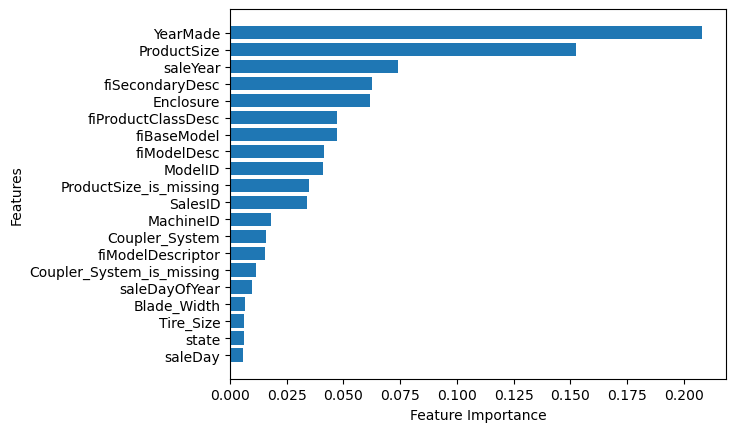

In [43]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [44]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True
